In [1]:
# Import necessary libraries
pip install pandas numpy matplotlib seaborn folium


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from folium import Map, CircleMarker
from folium.plugins import HeatMap

In [3]:
# Load dataset
file_path = r'US_Accidents_March23.csv'
df = pd.read_csv(file_path)

In [18]:
# Display basic information about the dataset
print("Basic Information:")
info_df = pd.DataFrame({'Column': df.columns,
                        'Non-Null Count': df.notnull().sum(),
                        'Dtype': df.dtypes})
print(info_df)

Basic Information:
                                      Column  Non-Null Count           Dtype
ID                                        ID         7508524          object
Source                                Source         7508524          object
Severity                            Severity         7508524           int64
Start_Time                        Start_Time         6788381  datetime64[ns]
End_Time                            End_Time         6788381  datetime64[ns]
Start_Lat                          Start_Lat         7508524         float64
Start_Lng                          Start_Lng         7508524         float64
End_Lat                              End_Lat         4188388         float64
End_Lng                              End_Lng         4188388         float64
Distance(mi)                    Distance(mi)         7508524         float64
Description                      Description         7508519          object
Street                                Street         7498

In [23]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [22]:
# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
print(df.head().to_markdown())


First 5 Rows:
|    | ID   | Source   |   Severity | Start_Time          | End_Time            |   Start_Lat |   Start_Lng |   End_Lat |   End_Lng |   Distance(mi) | Description                                                                           | Street                    | City         | County     | State   | Zipcode    | Country   | Timezone   | Airport_Code   | Weather_Timestamp   |   Temperature(F) |   Wind_Chill(F) |   Humidity(%) |   Pressure(in) |   Visibility(mi) | Wind_Direction   |   Wind_Speed(mph) |   Precipitation(in) | Weather_Condition   | Amenity   | Bump   | Crossing   | Give_Way   | Junction   | No_Exit   | Railway   | Roundabout   | Station   | Stop   | Traffic_Calming   | Traffic_Signal   | Turning_Loop   | Sunrise_Sunset   | Civil_Twilight   | Nautical_Twilight   | Astronomical_Twilight   |   Hour |   Day |   Month |
|---:|:-----|:---------|-----------:|:--------------------|:--------------------|------------:|------------:|----------:|----------:|---------

In [24]:
# Describe numerical features
print("\nNumerical Features Description:")
print(df.describe().to_markdown())


Numerical Features Description:
|       |    Severity | Start_Time                    | End_Time                      |    Start_Lat |      Start_Lng |      End_Lat |        End_Lng |   Distance(mi) |   Temperature(F) |   Wind_Chill(F) |   Humidity(%) |   Pressure(in) |   Visibility(mi) |   Wind_Speed(mph) |   Precipitation(in) |         Hour |         Day |        Month |
|:------|------------:|:------------------------------|:------------------------------|-------------:|---------------:|-------------:|---------------:|---------------:|-----------------:|----------------:|--------------:|---------------:|-----------------:|------------------:|--------------------:|-------------:|------------:|-------------:|
| count | 7.50852e+06 | 6788381                       | 6788381                       |  7.50852e+06 |    7.50852e+06 |  4.18839e+06 |    4.18839e+06 |    7.50852e+06 |      7.50852e+06 |     5.69894e+06 |   7.49848e+06 |    7.50198e+06 |      7.50852e+06 |       7.09593e+06 |  

In [25]:
# Describe categorical features
print("\nCategorical Features Description:")
print(df.describe(include=['O']).to_markdown())


Categorical Features Description:
|        | ID      | Source   | Description                                                     | Street   | City    | County      | State   |          Zipcode | Country   | Timezone   | Airport_Code   | Weather_Timestamp   | Wind_Direction   | Weather_Condition   | Sunrise_Sunset   | Civil_Twilight   | Nautical_Twilight   | Astronomical_Twilight   |
|:-------|:--------|:---------|:----------------------------------------------------------------|:---------|:--------|:------------|:--------|-----------------:|:----------|:-----------|:---------------|:--------------------|:-----------------|:--------------------|:-----------------|:-----------------|:--------------------|:------------------------|
| count  | 7508524 | 7508524  | 7508519                                                         | 7498082  | 7508282 | 7508524     | 7508524 |      7.50852e+06 | 7508524   | 7508524    | 7508524        | 7508524             | 7472204          | 7508524       

In [26]:
# Display the shape of the dataset
print("\nDataset Shape:")
shape_df = pd.DataFrame({'Rows': [df.shape[0]], 'Columns': [df.shape[1]]})
print(shape_df.to_markdown())


Dataset Shape:
|    |        Rows |   Columns |
|---:|------------:|----------:|
|  0 | 7.50852e+06 |        49 |


In [10]:
# Convert date columns to datetime with error handling
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

In [11]:
# Extracting useful features
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['Month'] = df['Start_Time'].dt.month


In [12]:
# Handle missing values
df = df.dropna(subset=['Start_Lat', 'Start_Lng', 'Temperature(F)', 'Visibility(mi)', 'Weather_Condition'])


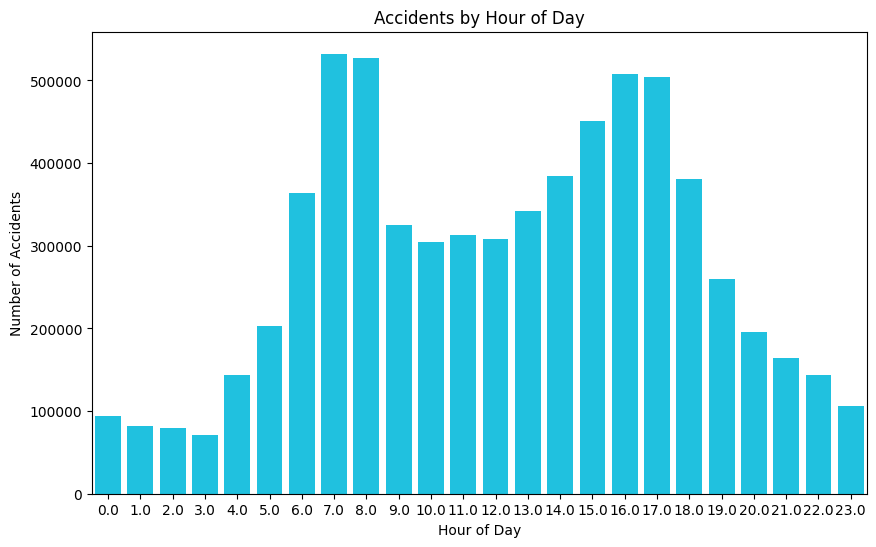

In [44]:
# Define color palette with shades of bright colors
color_palette = sns.color_palette("bright", 10)

plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df, color=color_palette[-1])  
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

C:\Users\rajwa\AppData\Local\Temp\ipykernel_6944\3152375051.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day', data=df, palette=color_palette)
C:\Users\rajwa\AppData\Local\Temp\ipykernel_6944\3152375051.py:4: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.countplot(x='Day', data=df, palette=color_palette)


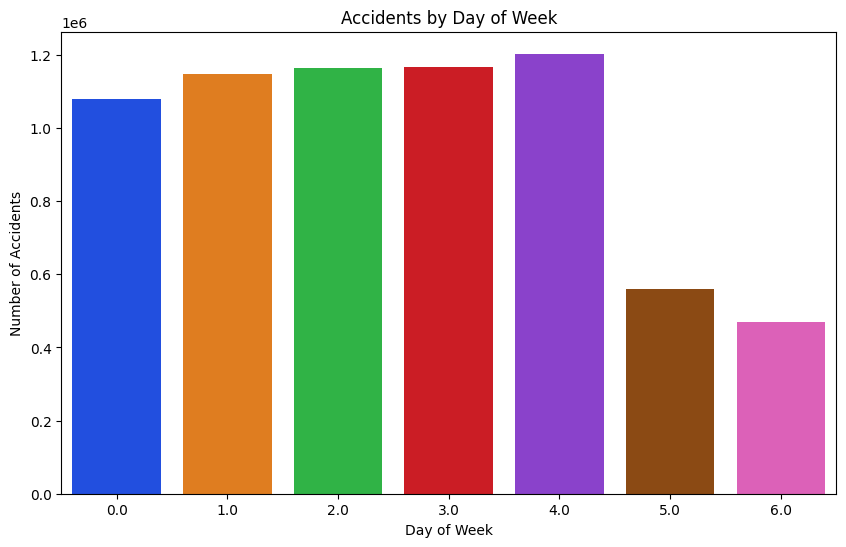

In [46]:

color_palette = sns.color_palette("bright")

plt.figure(figsize=(10, 6))
sns.countplot(x='Day', data=df, palette=color_palette)
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

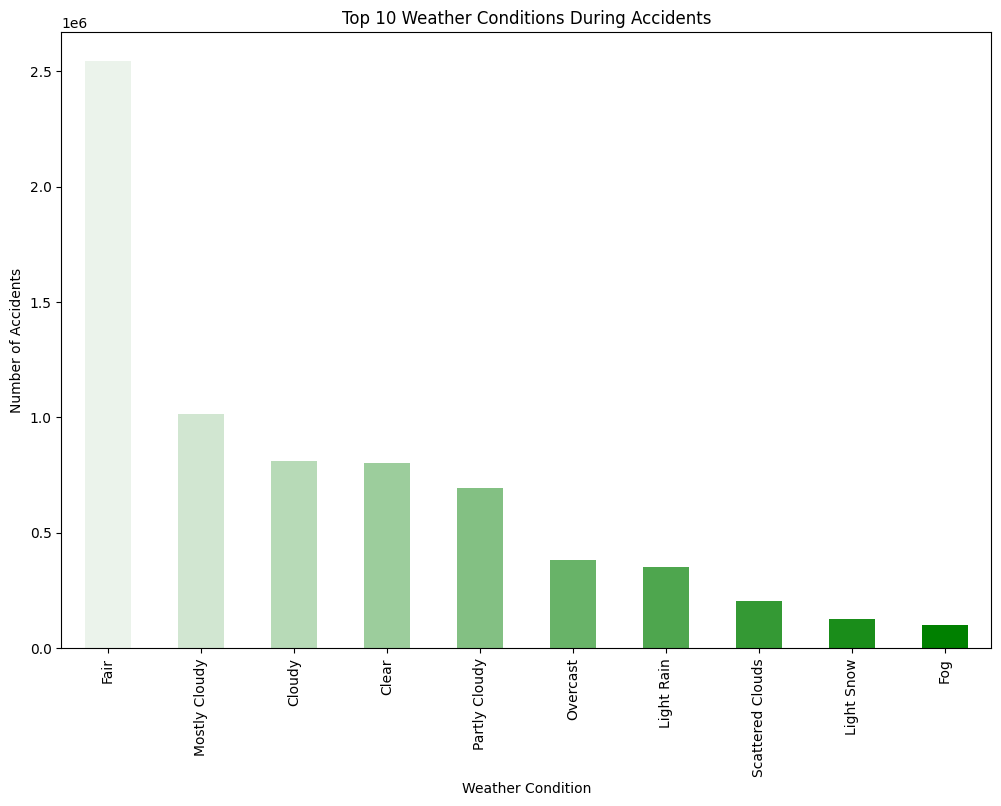

In [47]:
green_palette = sns.light_palette("green", n_colors=10)

plt.figure(figsize=(12, 8))
df['Weather_Condition'].value_counts().head(10).plot(kind='bar', color=green_palette)
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

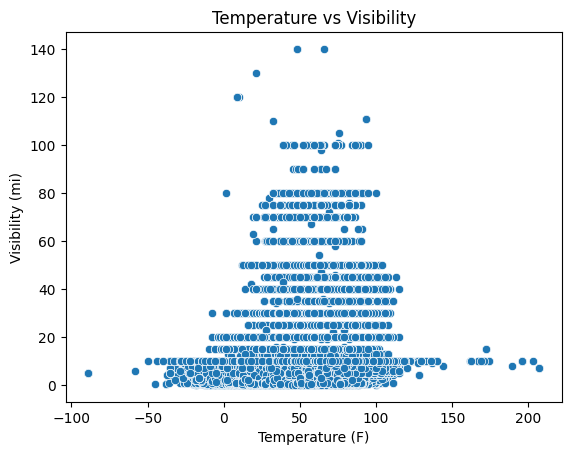

In [29]:
# Create scatter plot
sns.scatterplot(data=df, x='Temperature(F)', y='Visibility(mi)')
plt.title('Temperature vs Visibility')
plt.xlabel('Temperature (F)')
plt.ylabel('Visibility (mi)')
plt.show()

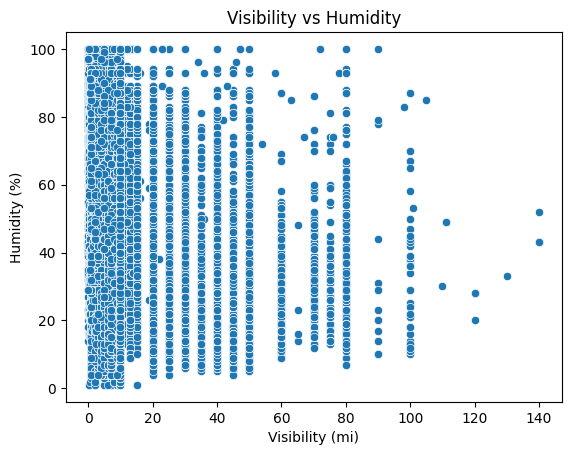

In [30]:
sns.scatterplot(data=df, x='Visibility(mi)', y='Humidity(%)')
plt.title('Visibility vs Humidity')
plt.xlabel('Visibility (mi)')
plt.ylabel('Humidity (%)')
plt.show()


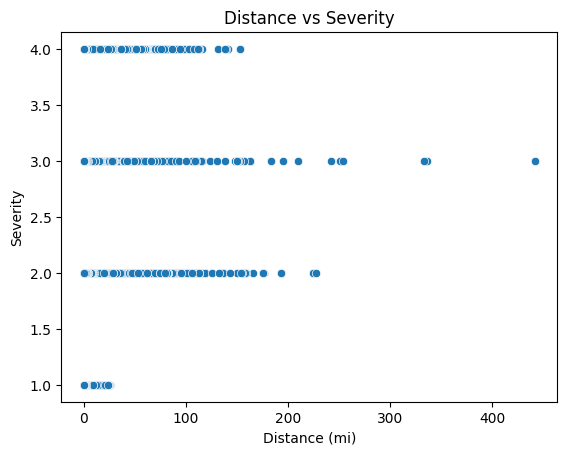

In [31]:
sns.scatterplot(data=df, x='Distance(mi)', y='Severity')
plt.title('Distance vs Severity')
plt.xlabel('Distance (mi)')
plt.ylabel('Severity')
plt.show()


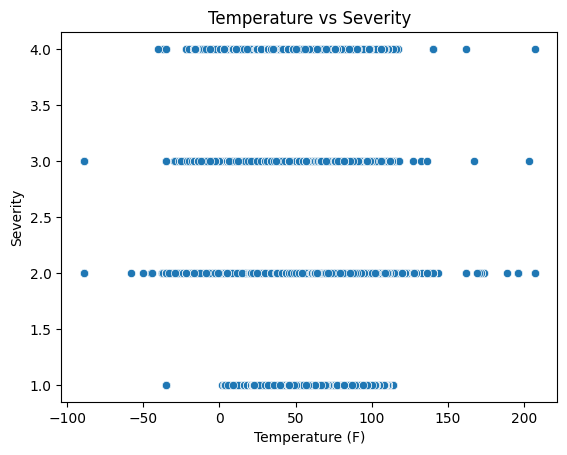

In [32]:
sns.scatterplot(data=df, x='Temperature(F)', y='Severity')
plt.title('Temperature vs Severity')
plt.xlabel('Temperature (F)')
plt.ylabel('Severity')
plt.show()


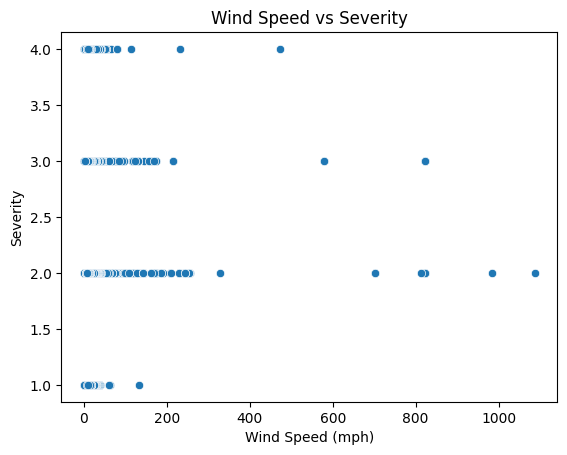

In [33]:
sns.scatterplot(data=df, x='Wind_Speed(mph)', y='Severity')
plt.title('Wind Speed vs Severity')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Severity')
plt.show()


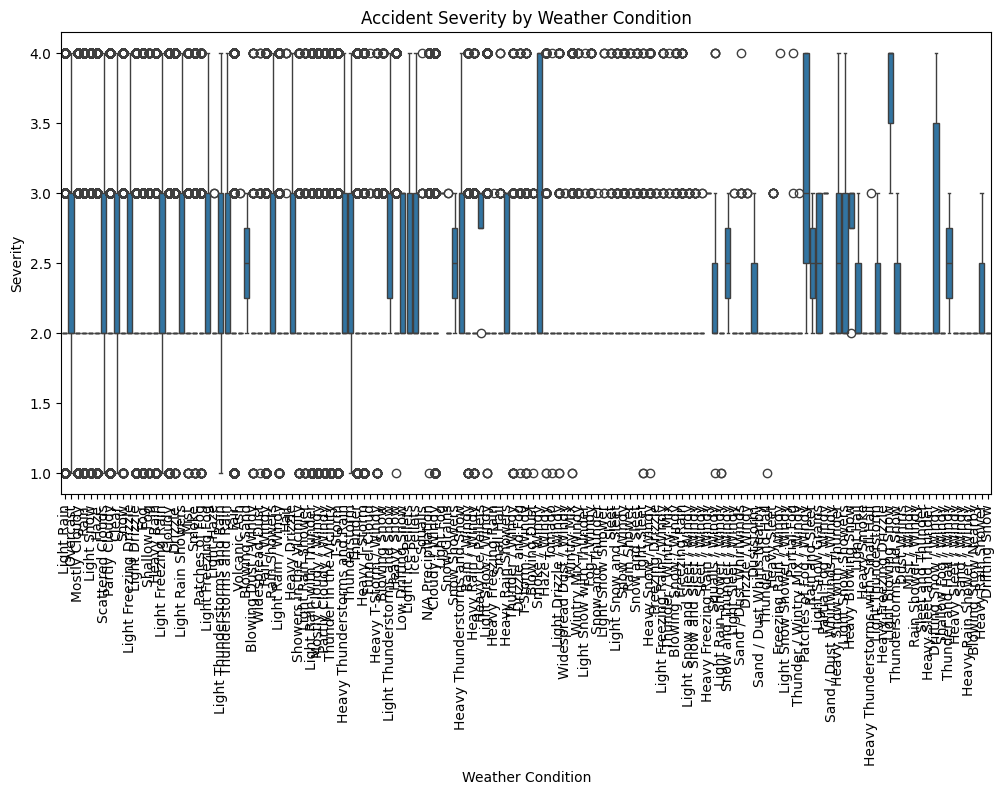

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather_Condition', y='Severity', data=df)
plt.xticks(rotation=90)
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Severity')
plt.show()


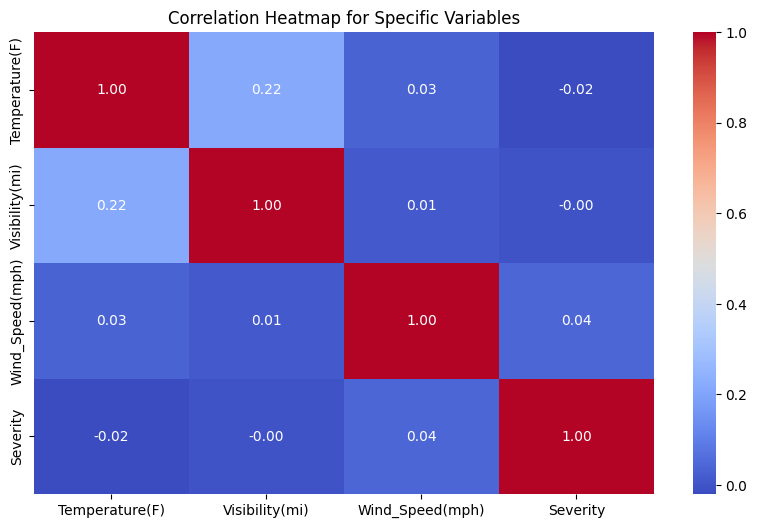

In [36]:
# Subset dataframe with specific columns
specific_df = df[['Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Severity']]

# Calculate pairwise correlation
correlation_matrix = specific_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Specific Variables')
plt.show()


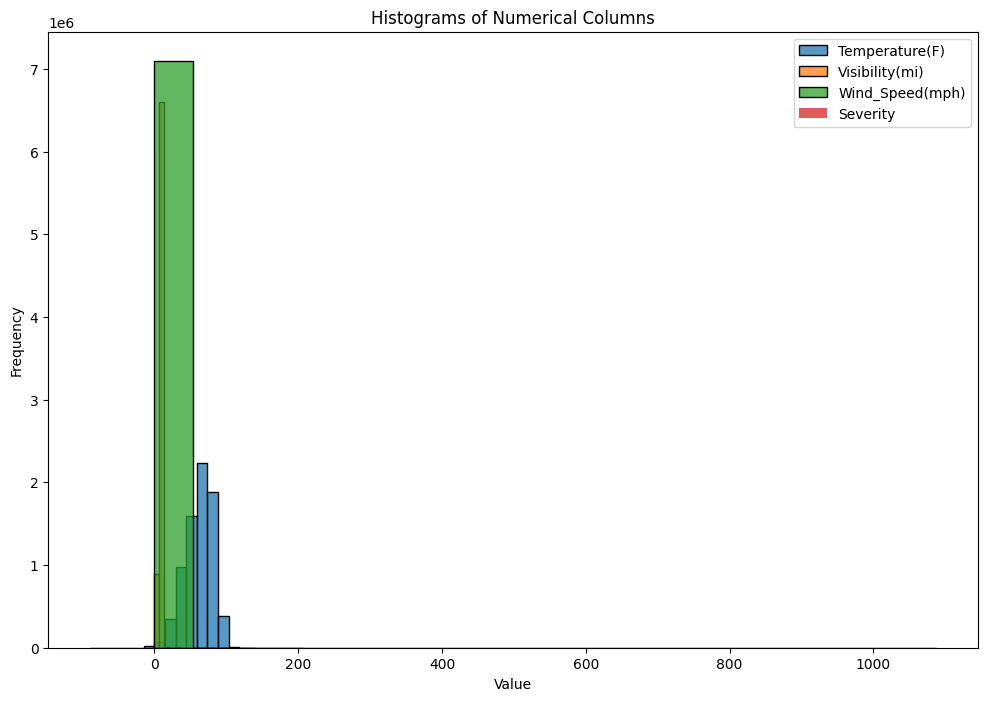

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = ['Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Severity']

# Plot histograms
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    sns.histplot(df[column], kde=False, bins=20, label=column)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Numerical Columns')
plt.legend()
plt.show()


C:\Users\rajwa\AppData\Local\Temp\ipykernel_6944\2263441309.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=categorical_column, order=df[categorical_column].value_counts().index[:10], palette=color_palette)


Text(0, 0.5, 'Count')

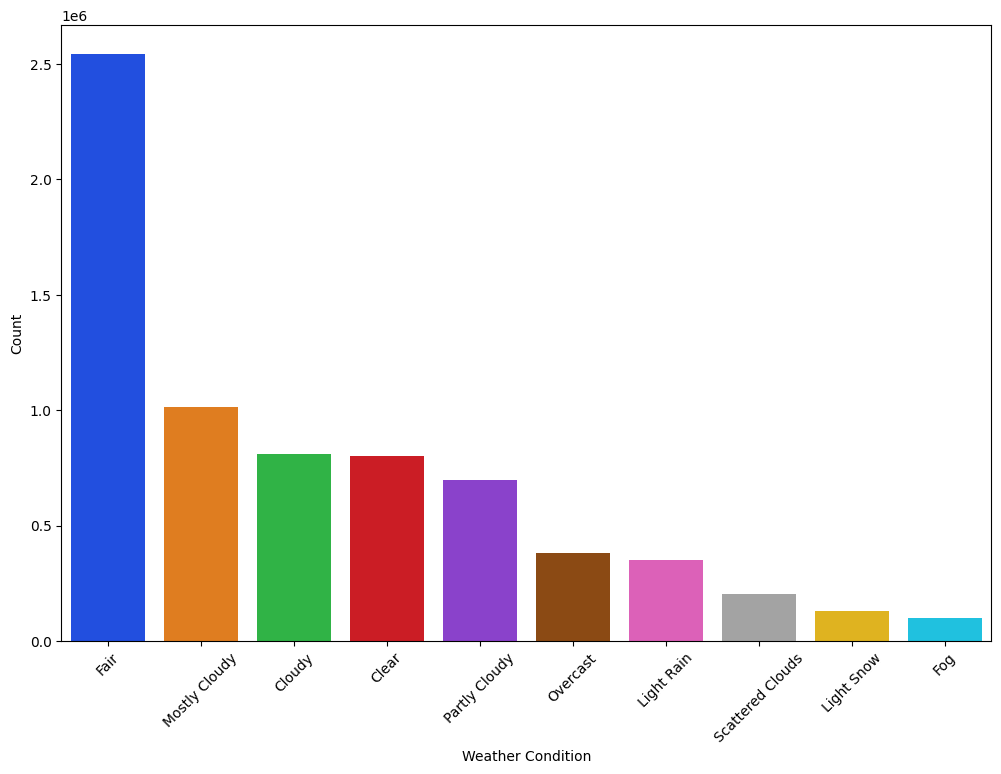

In [45]:
# Define a bright color palette
color_palette = sns.color_palette("bright")

# Select categorical column
categorical_column = 'Weather_Condition'

# Plot count plot with bright color palette
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x=categorical_column, order=df[categorical_column].value_counts().index[:10], palette=color_palette)
plt.xticks(rotation=45)
plt.xlabel('Weather Condition')
plt.ylabel('Count')

C:\Users\rajwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\rajwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(*plot_args, **plot_kwargs)
C:\Users\rajwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` f

<Figure size 1400x900 with 0 Axes>

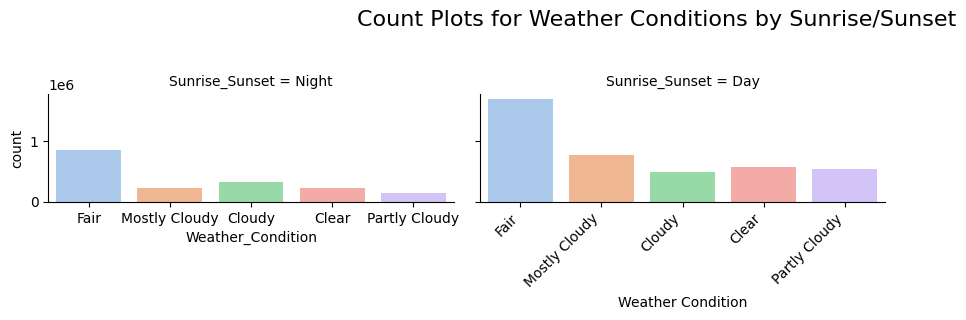

In [52]:
# Select categorical columns
categorical_columns = ['Weather_Condition', 'Traffic_Signal', 'Sunrise_Sunset']

# Define color palette
colors = sns.color_palette("pastel")

# Plot count plot using facet grid
plt.figure(figsize=(14, 9))  # Increase the width of the figure
g = sns.FacetGrid(df, col='Sunrise_Sunset', col_wrap=3, aspect=1.5)  # Adjust aspect ratio
g.map(sns.countplot, 'Weather_Condition', order=df['Weather_Condition'].value_counts().index[:5], palette=colors)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.xlabel('Weather Condition')
plt.ylabel('Count')

# Add centered title
plt.suptitle('Count Plots for Weather Conditions by Sunrise/Sunset', x=0.5, y=1.05, ha='center', fontsize=16)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

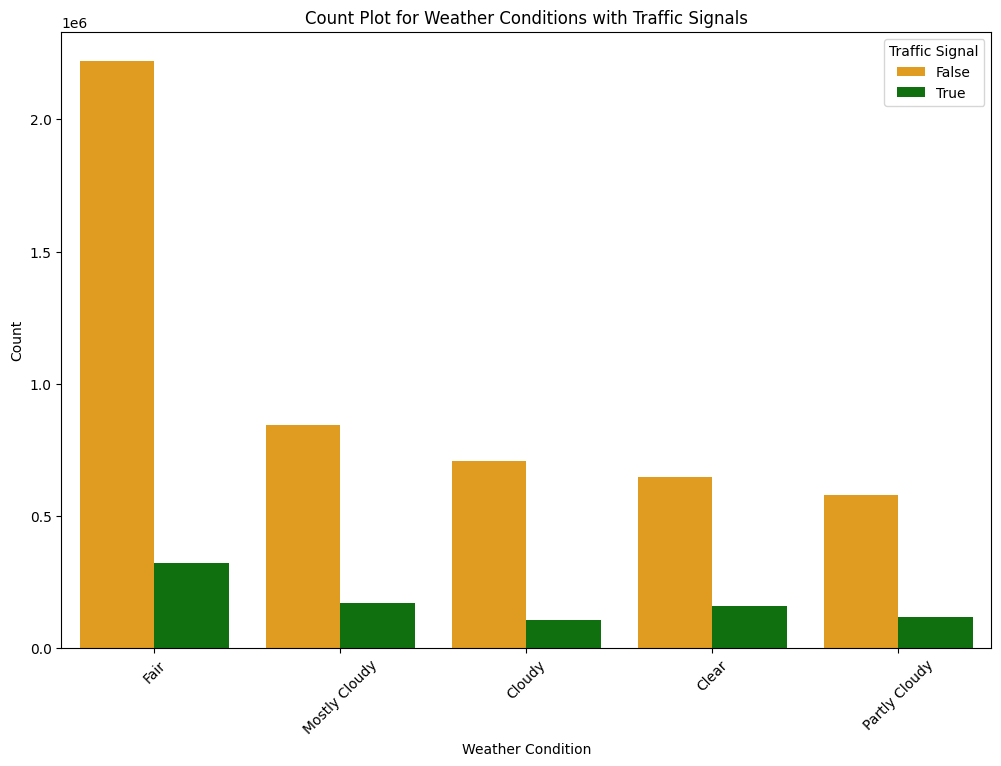

In [56]:
# Determine unique values of 'Traffic_Signal' column
unique_traffic_signals = df['Traffic_Signal'].unique()

# Define custom colors for each unique traffic signal
custom_palette = {signal: color for signal, color in zip(unique_traffic_signals, ['orange', 'green', 'blue'])}

# Plot the count plot with the custom palette
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Weather_Condition', hue='Traffic_Signal', palette=custom_palette, order=df['Weather_Condition'].value_counts().index[:5])
plt.xticks(rotation=45)
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.title('Count Plot for Weather Conditions with Traffic Signals')
plt.legend(title='Traffic Signal')
plt.show()


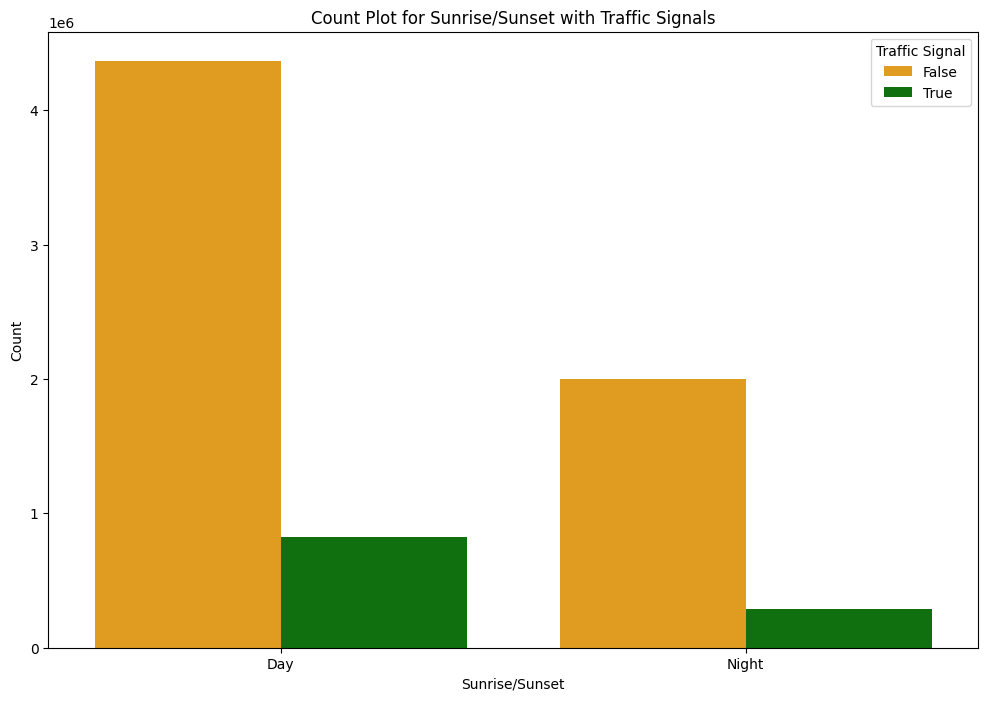

In [58]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Sunrise_Sunset', hue='Traffic_Signal', palette=custom_palette, order=df['Sunrise_Sunset'].value_counts().index)
plt.xlabel('Sunrise/Sunset')
plt.ylabel('Count')
plt.title('Count Plot for Sunrise/Sunset with Traffic Signals')
plt.legend(title='Traffic Signal')
plt.show()


In [62]:
one_hot_encoded_df = pd.get_dummies(df, columns=['Weather_Condition'], prefix='Category')


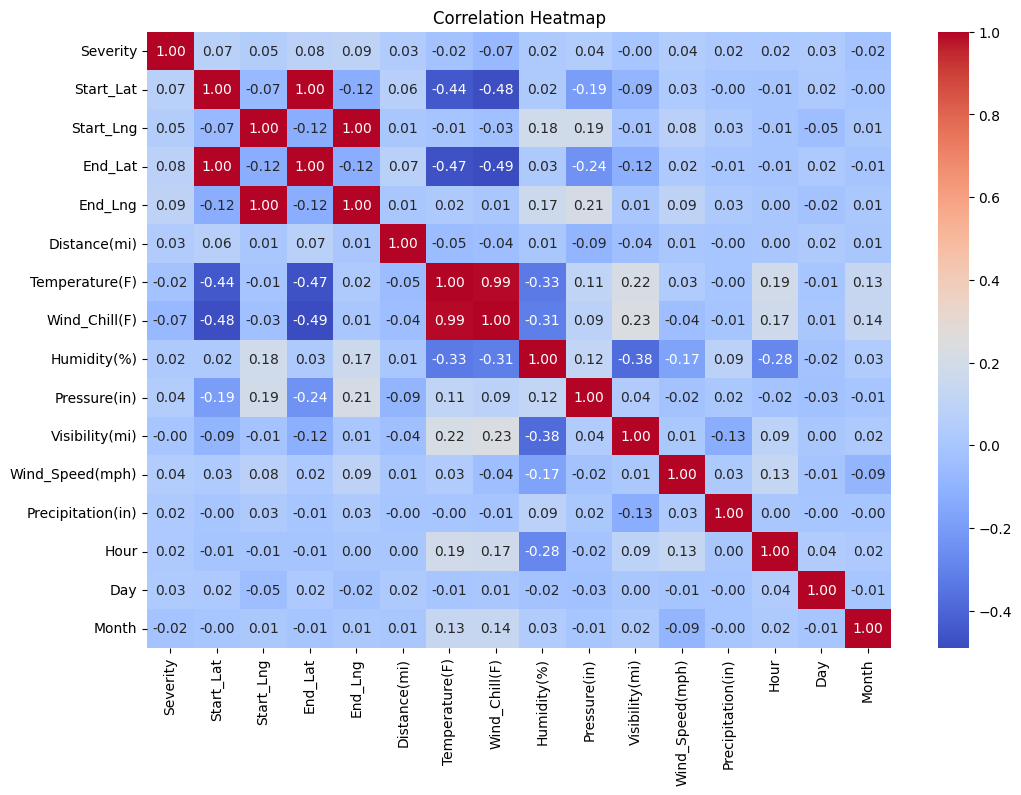

In [64]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
